## Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
%matplotlib inline

## Import dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/kurkurzz/diabetes-classification/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data cleaning

Features like Glucose, BloodPressure, SkinThickness, Insulin and BMI cannot have 0 values. So all these rows will be dropped.

In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df = df.dropna() # remove rows with null entries
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Standardize data
Subtract mean and divide by standard deviation from all features.

In [ ]:
df_input = df[['Age','BMI','BloodPressure','DiabetesPedigreeFunction','Glucose','Insulin','Pregnancies', 'SkinThickness']]
df_input = (df_input-df_input.mean())/df_input.std()
df[['Age','BMI','BloodPressure','DiabetesPedigreeFunction','Glucose','Insulin','Pregnancies', 'SkinThickness']] = df_input
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,-0.716511,-1.089653,-0.373178,-0.584363,-0.522175,-0.709514,-1.030559,-0.967063,0
4,-1.027899,0.465719,-2.453828,0.556709,0.100502,1.424909,5.108582,0.209318,1
6,-0.093734,-1.446093,-1.653578,0.271441,-0.572662,-0.296859,-0.796108,-0.476904,1
8,-0.405123,2.409934,-0.053078,1.507603,3.255961,-0.368007,-1.056609,2.169953,1
13,-0.716511,2.150705,-0.853328,-0.584363,5.805571,-0.424924,-0.361940,2.758143,1
...,...,...,...,...,...,...,...,...,...
753,-1.027899,1.891477,1.387373,1.412514,2.978280,1.453368,-0.871364,-0.476904,1
755,-0.716511,0.174087,1.387373,0.937067,-0.387542,0.485763,1.545507,0.601445,1
760,-0.405123,-1.122057,-1.013378,-0.299095,-1.178510,-0.666826,0.703220,-0.869031,0
763,2.085984,-0.700810,0.427072,1.792871,0.201477,-0.026499,-1.018981,3.150270,0


## Data Visualisation

Visualizing frequency of the outcome.

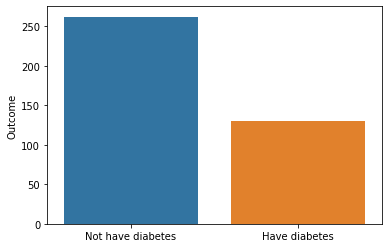

In [ ]:
sns.barplot(x=['Not have diabetes','Have diabetes'], y=df['Outcome'].value_counts())

### Pearson correlation for Continous Variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Pearson Correlation')]

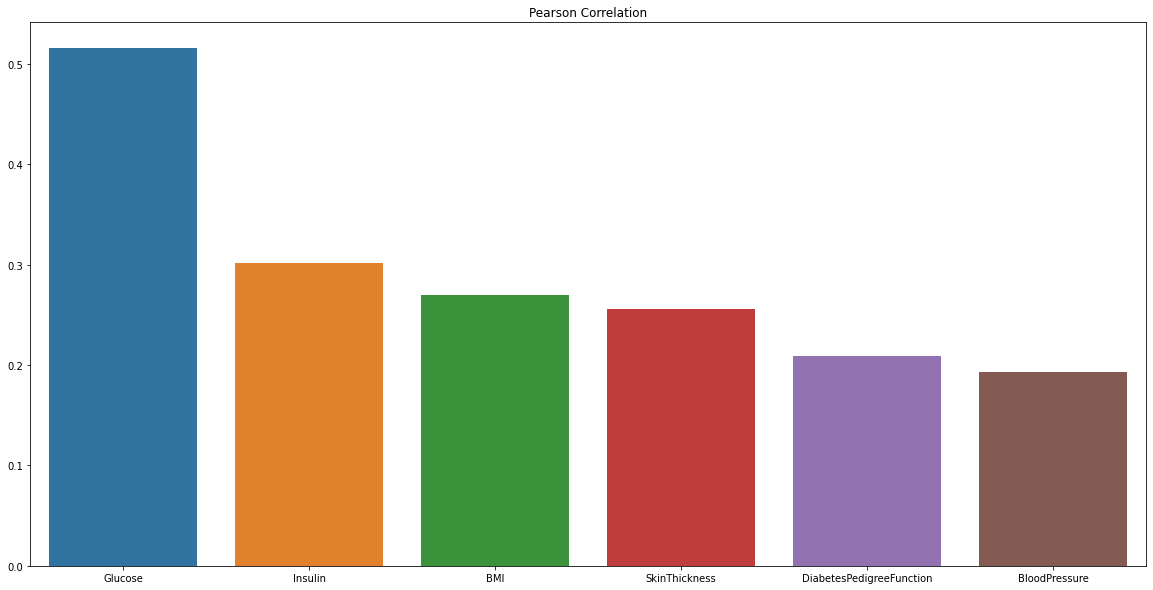

In [ ]:
corr = df.corr()['Outcome'].drop(['Outcome','Age','Pregnancies']).sort_values(ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(corr.index, corr.values).set(title='Pearson Correlation')

In [ ]:
corr

Glucose                     0.515703
Insulin                     0.301429
BMI                         0.270118
SkinThickness               0.255936
DiabetesPedigreeFunction    0.209330
BloodPressure               0.192673
Name: Outcome, dtype: float64

### Spearman correlation for Discrete Variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Spearman Correlation')]

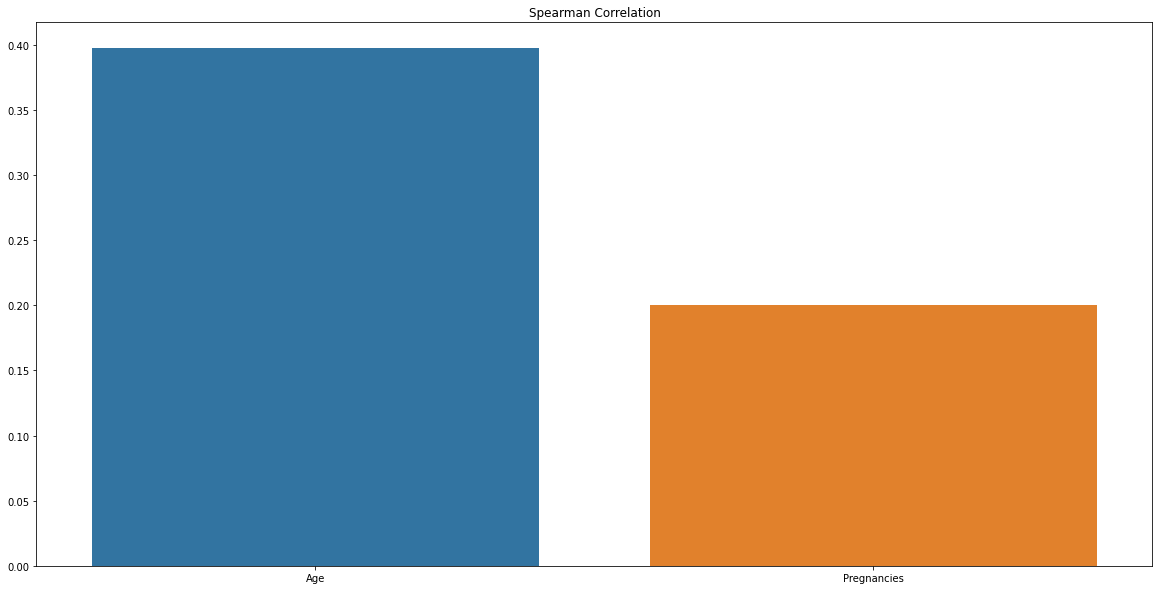

In [ ]:
corr2 = df.corr(method='spearman')['Outcome'].drop(['Outcome','DiabetesPedigreeFunction','BMI','Insulin','SkinThickness','BloodPressure','Glucose']).sort_values(ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(corr2.index, corr2.values).set(title='Spearman Correlation')

In [ ]:
corr2

Age            0.397355
Pregnancies    0.200234
Name: Outcome, dtype: float64

## **Activation Functions**

Use several activation functions to be tested in the logistic regression process.

### Sigmoid Activation Function

In [ ]:
def sigmoid(z):
    """
    Compute sigmoid function given the input z
    """
    # convert input to a numpy array
    z = np.array(z)
    
    # You need to return the following variables correctly 
    g = np.zeros(z.shape)

    
    g = 1 / ( 1 + np.exp(-z))
    
    return g

## **Binary Cross Entropy cost function**
theta : weights <br>
X : inputs <br>
y : labels <br>
act_func : activation function used. Default is sigmoid <br>
lambda_ : size of regularization paramter. Default is 0 <br>

In [ ]:
def costFunction(theta, X, y, act_func=sigmoid, lambda_=0):
    """
    Compute cost and gradient for logistic regression.
    """
    # Initialize some useful values
    m = y.size  # number of training examples

    theta_copy = theta.copy()
    theta_copy[0] = 0

    
    h = act_func( np.dot(X, theta) )
    J = (1/m) * np.sum(  -(y*(np.log(h))) - ((1-y)*(np.log(1-h)))  ) + ((lambda_/(2*m)) * np.dot(theta_copy.T, theta_copy))
    
    grad = (1/m)*np.dot(X.T,(h-y)) + ((lambda_/m)*theta_copy)
    
    return J, grad

## Make predictions based on the weights theta
Takes in a threshold value and classifies as 1 or 0 (or 1 or -1)

In [ ]:
def predict(X, theta, act_func=sigmoid, threshold=0.5):
    """
    Predict whether the label is 0 or 1 (or -1 or 1) using learned logistic regression.  
    """
    m = X.shape[0] # Number of training examples

    p = np.zeros(m)
    
    p = act_func(np.dot(X, theta)) > threshold
    
    return p

## **Gradient Descent**

In [ ]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100,act_func=sigmoid, lambda_=0):
    m = y.shape[0]
    cost_history = np.zeros((iterations,))
    theta_history = np.zeros((iterations,X.shape[1]))
    
    for i in range(iterations):
        z = np.dot(X, theta)
        prediction = act_func(z)
        
        J, grad = costFunction(theta, X, y, act_func, lambda_)
        
        theta = theta - ( (1/m) * learning_rate * grad )
        
        # storing the cost values
        cost_history[i] = J
        
        # storing theta values
        theta_history[i,:] = theta
        
    return theta, theta_history, cost_history

# Running logistic regression

In [ ]:
data = df.to_numpy() # convert the data to numpy array

np.random.seed(5) # seed to get same graphs
np.random.shuffle(data)

# adding a column of ones
m = data.shape[0]
data = np.hstack((np.ones((m,1)),data))

# splitting data into features and labels
X = data[:, 0:-1]
y = data[:,-1]

# what % of the data to be in the trianing set
train_size = 0.7 
X_train, X_test, y_train, y_test = X[:int(0.7*m),:], X[int(0.7*m):,:], y[:int(0.7*m)], y[int(0.7*m):]

## Learning rate selection
0.3 seems to be the best learning rate

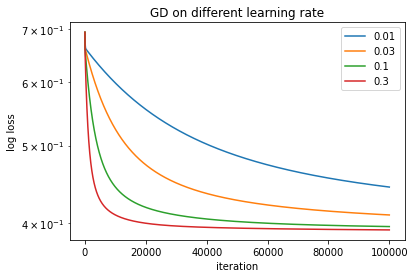

In [ ]:
# settings for gradient descent
iterations = 100000
learning_rates = [0.01, 0.03, 0.1, 0.3]
initial_theta = np.zeros((X.shape[1],)) # initializing parameters to 0

# for graph plotting
x_axis = np.arange(start=0, stop=iterations, step=1)

theta_storage = {}
for alpha in learning_rates:

    # running logistic regression with different alpha
    theta, theta_history, cost_history = gradient_descent(X_train,y_train,initial_theta,learning_rate=alpha,iterations=iterations)
    
    theta_storage[alpha] = (theta, theta_history, cost_history)
    
    plt.plot(x_axis, cost_history)

plt.title("GD on different learning rate")
plt.xlabel("iteration")
plt.ylabel("log loss")
plt.legend(learning_rates, loc ="upper right")
plt.yscale("log")

## Chceking if the model overfits
Model doesn't seem to be overfitting as the accuracy does not drop after a certain number of iterations

test set accuracy =  0.7457627118644068
max of predictions graph = 0.7457627118644068


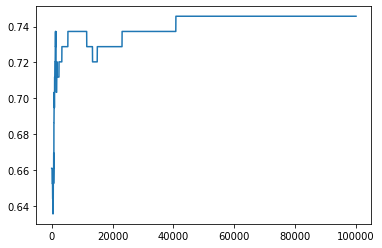

In [ ]:
alpha = 0.3

predictions = predict(X_test, theta_storage[alpha][0])
# accuracy calculation
correct = predictions == y_test
print("test set accuracy = ", sum(correct)/correct.size)

predictions_graph = []

for i in range(len(theta_storage[alpha][1])):
    predictions = predict(X_test, theta_storage[alpha][1][i])
    
    correct = predictions == y_test

    predictions_graph.append(sum(correct)/correct.size)

print("max of predictions graph =", max(predictions_graph))
plt.plot(np.arange(start=0, stop=len(theta_storage[alpha][1]), step=1) , predictions_graph)

# **Model Evaluation**

## Confusion matrix

In [ ]:
def compute_confusion_matrix(true, pred):
  '''Computes a confusion matrix using numpy for two np.arrays
  true and pred.

  Results are identical (and similar in computation time) to: 
    "from sklearn.metrics import confusion_matrix"

  However, this function avoids the dependency on sklearn.'''
  K = len(np.unique(true)) # Number of classes 
  result = np.zeros((K, K))
  for i in range(len(true)):
    result[true[i]][pred[i]] += 1

  return result.astype(int)

In [ ]:
conf_matrix = compute_confusion_matrix(y_test.astype(int),predict(X_test, theta)+0)
conf_matrix

array([[65, 13],
       [17, 23]])

## Choosing the best threshold

Best threshold is chosen based on the receiver operating characteristic curve.
Since we are predicting wether a person have disease, it is important to minimise false negative.

In [ ]:
def calc_fpr_tpr(conf_matrix):
  tpr = conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[1][0])
  fpr = conf_matrix[0][1]/(conf_matrix[0][1]+conf_matrix[0][0])
  return (fpr,tpr)

In [ ]:
fpr_list = []
tpr_list = []
for i in np.linspace(0,1,100):
  conf_matrix = compute_confusion_matrix(y_test.astype(int),predict(X_test, theta,threshold=i)+0)
  fpr,tpr = calc_fpr_tpr(conf_matrix)
  fpr_list.append(fpr)
  tpr_list.append(tpr)

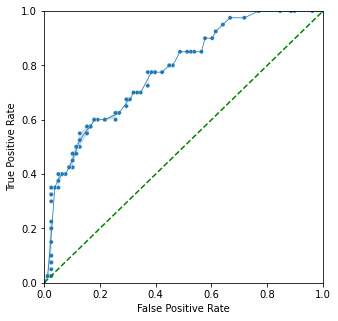

In [ ]:
plt.figure(figsize=(5,5))
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
ax = sns.lineplot(x=[0,1],y=[0,1],color='green')
ax.lines[0].set_linestyle("--")
sns.lineplot(x=fpr_list,y=tpr_list,size=1)
sns.scatterplot(x=fpr_list,y=tpr_list,size=1)
plt.legend([],[], frameon=False)

# **0.5 threshold value is chosen**

## Calculate f1-score

In [ ]:
def compute_f1_score(conf_matrix):
  recall = (conf_matrix[1][1])/(conf_matrix[1][1]+conf_matrix[1][0])
  precision = (conf_matrix[1][1])/(conf_matrix[1][1]+conf_matrix[0][1])
  f1 = 2*(precision * recall)/(precision + recall)
  return f1

In [ ]:
compute_f1_score(conf_matrix)

0.60501
